In [13]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
#path to csv files
sf_2017 = "2017_StopFrisk.csv"

In [15]:
df_2017 = pd.read_csv(sf_2017, low_memory=False)

In [16]:
df_2017.head()

,STOP_FRISK_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,SPRINT_NUMBER,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_PREMISES_NAME,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/16/2017,14:26:00,2017,January,Monday,Based on Self Initiated,11617924,APP,SGT,...,(null),(null),180 GREENWICH STREET,(null),GREENWICH STREET,982381,201750,(null),PBMS,MANHATTAN
1,2,1/16/2017,14:26:00,2017,January,Monday,Based on Self Initiated,11617924,APP,SGT,...,(null),(null),180 GREENWICH STREET,(null),GREENWICH STREET,982381,201750,(null),PBMS,MANHATTAN
2,3,2/8/2017,11:10:00,2017,February,Wednesday,Based on C/W on Scene,17020808555,APP,POM,...,C,(null),WALL STREET && BROADWAY,(null),WALL STREET,981005,197131,(null),PBMS,MANHATTAN
3,4,2/20/2017,11:35:00,2017,February,Monday,Based on Self Initiated,9027,APP,POM,...,H,(null),75 GREENE STREET,(null),GREENE STREET,984031,202796,(null),PBMS,MANHATTAN
4,5,2/21/2017,13:20:00,2017,February,Tuesday,Based on Radio Run,10439,APP,POM,...,H,2,429 WEST BROADWAY,(null),WEST BROADWAY,983894,203523,(null),PBMS,MANHATTAN


In [17]:
df_2017.columns

Index(['STOP_FRISK_ID', 'STOP_FRISK_DATE', 'STOP_FRISK_TIME', 'YEAR2',
       'MONTH2', 'DAY2', 'STOP_WAS_INITIATED', 'SPRINT_NUMBER',
       'RECORD_STATUS_CODE', 'ISSUING_OFFICER_RANK',
       'ISSUING_OFFICER_COMMAND_CODE', 'SUPERVISING_OFFICER_RANK',
       'SUPERVISING_OFFICER_COMMAND_CODE',
       'SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED',
       'LOCATION_IN_OUT_CODE', 'JURISDICTION_CODE', 'JURISDICTION_DESCRIPTION',
       'OBSERVED_DURATION_MINUTES', 'SUSPECTED_CRIME_DESCRIPTION',
       'STOP_DURATION_MINUTES', 'OFFICER_EXPLAINED_STOP_FLAG',
       'OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION', 'OTHER_PERSON_STOPPED_FLAG',
       'SUSPECT_ARRESTED_FLAG', 'SUSPECT_ARREST_NUMBER',
       'SUSPECT_ARREST_OFFENSE', 'SUMMONS_ISSUED_FLAG', 'SUMMONS_NUMBER',
       'SUMMONS_OFFENSE_DESCRIPTION', 'OFFICER_IN_UNIFORM_FLAG',
       'ID_CARD_IDENTIFIES_OFFICER_FLAG', 'SHIELD_IDENTIFIES_OFFICER_FLAG',
       'VERBAL_IDENTIFIES_OFFICER_FLAG', 'FRISKED_FLAG', 'SEARCHED_FLAG

In [18]:
df_reduced = df_2017[['STOP_FRISK_ID', 'STOP_FRISK_TIME', 'MONTH2', 'DAY2', 'SUSPECTED_CRIME_DESCRIPTION', 'STOP_DURATION_MINUTES', 'SUSPECT_ARRESTED_FLAG', 'FRISKED_FLAG', 'PHYSICAL_FORCE_WEAPON_IMPACT_FLAG', 'SUSPECT_REPORTED_AGE', 'SUSPECT_SEX', 'SUSPECT_RACE_DESCRIPTION', 'STOP_LOCATION_BORO_NAME']]

In [19]:
df_reduced.head()

,STOP_FRISK_ID,STOP_FRISK_TIME,MONTH2,DAY2,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,SUSPECT_ARRESTED_FLAG,FRISKED_FLAG,PHYSICAL_FORCE_WEAPON_IMPACT_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,STOP_LOCATION_BORO_NAME
0,1,14:26:00,January,Monday,TERRORISM,90,N,N,(null),39,MALE,(null),MANHATTAN
1,2,14:26:00,January,Monday,TERRORISM,90,N,N,(null),37,MALE,(null),MANHATTAN
2,3,11:10:00,February,Wednesday,OTHER,40,N,N,(null),(null),FEMALE,WHITE,MANHATTAN
3,4,11:35:00,February,Monday,GRAND LARCENY AUTO,40,N,Y,(null),31,MALE,BLACK HISPANIC,MANHATTAN
4,5,13:20:00,February,Tuesday,BURGLARY,60,N,N,(null),(null),FEMALE,BLACK,MANHATTAN


In [20]:
df_reduced = df_reduced.set_index("STOP_FRISK_ID")

In [21]:
df_reduced.to_csv("df_reduced.csv")

In [22]:
manhattan_df = df_reduced.loc[df_reduced["STOP_LOCATION_BORO_NAME"] == "MANHATTAN"]
brooklyn_df = df_reduced.loc[df_reduced["STOP_LOCATION_BORO_NAME"] == "BROOKLYN"]
bronx_df = df_reduced.loc[df_reduced["STOP_LOCATION_BORO_NAME"] == "BRONX"]
queens_df = df_reduced.loc[df_reduced["STOP_LOCATION_BORO_NAME"] == "QUEENS"]
staten_df = df_reduced.loc[df_reduced["STOP_LOCATION_BORO_NAME"] == "STATEN IS"]


In [23]:
## In which borough is the stop question and frisk technique most used? Least used?
manhattan_stops = len(manhattan_df)
print("Manhattan")
print(manhattan_stops)

brooklyn_stops = len(brooklyn_df)
print("Brooklyn")
print(brooklyn_stops)

bronx_stops = len(bronx_df)
print("Bronx")
print(bronx_stops)

queens_stops = len(queens_df)
print("Queens")
print(queens_stops)

staten_stops = len(staten_df)
print("Staten Island")
print(staten_stops)

Manhattan
2771
Brooklyn
3328
Bronx
2473
Queens
2079
Staten Island
546


(-1.1198205905365375,
 1.127949373596713,
 -1.1106891381892035,
 1.1038516185758618)

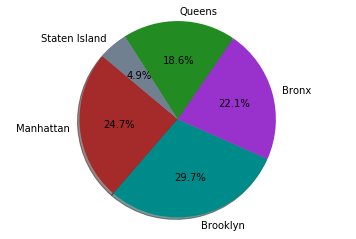

In [26]:
### Consider population ?????

borough_pie = ["Manhattan", "Brooklyn", "Bronx", "Queens", "Staten Island"]
boro_sqf_values = [2771, 3328, 2473, 2079, 546]
boro_pie_colors = ["brown", "darkcyan", "darkorchid", "forestgreen", "slategray"]

plt.pie(boro_sqf_values, labels=borough_pie, colors=boro_pie_colors, autopct="%1.1f%%",
 shadow=True, startangle=140)
# Create equal axes for nice circle
plt.axis("equal")

In [ ]:
## day and month 
